# Italian dataset

Our text corpus contains two different datasets: one made of 1123 Italian sentences and and another made of 1200 English sentences, which are rated by humans with a judgment of complexity. Judgments have been collected through a crowdsourcing task in which 20 native speakers of each language have been asked to judge how difficult they perceived a given sentence on a complexity scale from 1 (i.e. “very easy”) to 7 (i.e. “very difficult”).

The datasets of sentences have been taken from two different manually revised treebanks: the newspaper section of the Italian Universal Dependency Treebank (IUDT) for the Italian experiment, and the automatically converted Wall Street Journal section of the Penn Treebank for the English experiment.

In this notebook we are taking into consideration the italian dataset for our classification project, in which we try to build a model able to predict for each sentence the corresponding complexity judgement.

## **Data Exploratory Analysis**


### Importing libraries and the dataset

In [ ]:
# importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.subplots
import plotly.colors
import plotly.graph_objects as go
import sklearn

In [ ]:
# Importing the dataset from github

url = 'https://media.githubusercontent.com/media/nluninja/nlp_datasets/main/italiannlp/data/complexity_ds_it.csv'

In [ ]:
# Reading the dataset

dataset = pd.read_csv(url)
dataset

,ID,SENTENCE,judgement1,judgement2,judgement3,judgement4,judgement5,judgement6,judgement7,judgement8,...,judgement11,judgement12,judgement13,judgement14,judgement15,judgement16,judgement17,judgement18,judgement19,judgement20
0,951583956,"Quanto alla camminata incerta, va attribuita, ...",3,7,4,2,5,3,2,5,...,3,6,3,3,4,4,4,7,2,3
1,951584097,"Campione di rugby una delle vittime, un altro ...",2,4,3,2,3,3,3,1,...,1,1,2,1,1,3,2,2,2,3
2,951583629,Costo dalle 100.000 alle 150.000 il mq.,2,3,2,2,1,1,2,1,...,1,3,1,3,1,1,1,1,1,1
3,951583242,"A Valona, dove ieri è stata convocata un'altra...",1,5,3,4,2,2,1,3,...,1,3,4,2,3,1,4,3,5,3
4,951583156,"Il mito di Allende, più di 14 anni dopo la sua...",4,5,6,2,3,5,4,5,...,4,5,7,2,4,3,5,7,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,951584062,"Come sono morti, prima di lui, gli altri due o...",2,3,3,1,1,3,2,3,...,2,2,1,1,2,1,2,1,3,2
1118,951583512,E la semplicità non esclude che i tendaggi sia...,6,7,3,1,6,6,7,7,...,6,5,6,3,4,6,5,7,6,5
1119,951584059,"Dalla lirica, adesso, l'attenzione si sposta a...",2,2,3,3,3,2,2,2,...,2,3,2,1,1,2,2,2,6,3
1120,951583701,Li picchiarono e portarono nel carcere di Kindu.,1,3,2,1,5,2,1,2,...,2,3,1,1,1,5,1,2,1,3


### Data cleaning and preparation

Following the same procedure we have done for the english Dataset, we check for duplicates, empty Judgements and Sentences, and for Null values

In [ ]:
dupl_bool = dataset['SENTENCE'].duplicated(keep = False)
np.sum(dupl_bool)

0

We see that this time we do not have any duplicate sentences.

In [ ]:
dataset.shape

(1122, 22)

Check if some Judgements are out of the specified range [1 : 7]

In [ ]:
for k in range(dataset.shape[0]):
  for i in range(2, 22):
    if dataset.iloc[k, i] > 7:
      print(k, i)

We see that all Judgements are compliant with the 1-7 range.

In [ ]:
id = dataset.loc[:, 'ID']; print(id)
print('\n')
sentence = dataset.loc[:, 'SENTENCE']; print(sentence)

0       951583956
1       951584097
2       951583629
3       951583242
4       951583156
          ...    
1117    951584062
1118    951583512
1119    951584059
1120    951583701
1121    951583662
Name: ID, Length: 1122, dtype: int64


0       Quanto alla camminata incerta, va attribuita, ...
1       Campione di rugby una delle vittime, un altro ...
2                 Costo dalle 100.000 alle 150.000 il mq.
3       A Valona, dove ieri è stata convocata un'altra...
4       Il mito di Allende, più di 14 anni dopo la sua...
                              ...                        
1117    Come sono morti, prima di lui, gli altri due o...
1118    E la semplicità non esclude che i tendaggi sia...
1119    Dalla lirica, adesso, l'attenzione si sposta a...
1120     Li picchiarono e portarono nel carcere di Kindu.
1121    ''Io sono presidente della commissione Giustizia.
Name: SENTENCE, Length: 1122, dtype: object


In [ ]:
judg = dataset.iloc[ :, 2:]; judg

,judgement1,judgement2,judgement3,judgement4,judgement5,judgement6,judgement7,judgement8,judgement9,judgement10,judgement11,judgement12,judgement13,judgement14,judgement15,judgement16,judgement17,judgement18,judgement19,judgement20
0,3,7,4,2,5,3,2,5,3,3,3,6,3,3,4,4,4,7,2,3
1,2,4,3,2,3,3,3,1,3,3,1,1,2,1,1,3,2,2,2,3
2,2,3,2,2,1,1,2,1,2,2,1,3,1,3,1,1,1,1,1,1
3,1,5,3,4,2,2,1,3,7,2,1,3,4,2,3,1,4,3,5,3
4,4,5,6,2,3,5,4,5,5,7,4,5,7,2,4,3,5,7,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,2,3,3,1,1,3,2,3,3,3,2,2,1,1,2,1,2,1,3,2
1118,6,7,3,1,6,6,7,7,4,4,6,5,6,3,4,6,5,7,6,5
1119,2,2,3,3,3,2,2,2,1,2,2,3,2,1,1,2,2,2,6,3
1120,1,3,2,1,5,2,1,2,1,3,2,3,1,1,1,5,1,2,1,3


We now proceed to compute the mean and the median of the 20 different complexity judgements for each sentence, in order to have an idea of the frequency distributions of our data. 

In [ ]:
l_means = []
l_meds = []

for i in range(judg.shape[0]):
  l_means.append(round(np.mean(judg.iloc[i, :])))
  l_meds.append(round(np.median(judg.iloc[i, :])))

In [ ]:
count = 0

for i in range(judg.shape[0]):
  if l_means[i] == l_meds[i]:
    count += 1

print(round(count/judg.shape[0], 4))

0.7504


In the chunk above we see that in around 75% of the sentences the judgement associated with the mean is the same to the one associated with the computation of the median.

In [ ]:
count = 0

for i in range(judg.shape[0]):
  if abs(l_means[i] - l_meds[i]) <= 1:
    count += 1

print(round(count/judg.shape[0], 6))

0.999109


In addition, in almost all cases the difference of judgement provided by the mean and the median is below or equal to one.

First we try to see how the classes are balanced considering the median of the 20 judgements.

In [ ]:
df = pd.DataFrame(sentence)
df['Judgement'] = np.array(l_meds)

An example sentence is the following:

In [ ]:
print(f'{df.iloc[0,:][0]}', '\n' f'has judgement {df.iloc[0,:][1]}')

Quanto alla camminata incerta, va attribuita, fino a prova contraria, alla causa di sempre: 
has judgement 3


We check for NULL values and see that there are any.

In [ ]:
df.isnull().sum()

SENTENCE     0
Judgement    0
dtype: int64

We look for blank values and see that we do not have.

In [ ]:
blanck = []

for idx, sent, judg in df.itertuples():
  if type(sent) == str:
    if sent.isspace():
      blanck.append(idx)

blanck

[]

We then proceed to compute absolute and relative frequencies for judgements classes obtained with the median in order to build a bar plot to better visualize them.

In [ ]:
abs_val_med = df['Judgement'].value_counts()
rel_val_med = round(df['Judgement'].value_counts(normalize = True), 4)

In [ ]:
abs_val_med.sort_index()

1     60
2    304
3    280
4    362
5     95
6     21
Name: Judgement, dtype: int64

In [ ]:
rel_val_med.sort_index()

1    0.0535
2    0.2709
3    0.2496
4    0.3226
5    0.0847
6    0.0187
Name: Judgement, dtype: float64

In [ ]:
import plotly.express as px
# define a dataframe for the value to visualize
data_med = pd.DataFrame(rel_val_med.sort_index())
data_med.insert(1, "%", [str(round(t * 100, 4))+'%' for t in data_med['Judgement']] , True) # adding the percentage column

fig = px.bar(data_med, 
             color = [1, 2, 3, 4, 5, 6],
              labels = {
                  'index' : 'Judgement', 'value': 'Percentage (%)'
                  },
             title = 'Complexity Judgement for Median', 
             text = '%'
             )

fig.update(layout_coloraxis_showscale=False)
fig.layout.update(showlegend = False) 

fig.show()

Then, we try to see how the classes are balanced considering the means of the 20 judgements for each Sentence.

In [ ]:
df2 = pd.DataFrame(sentence)
df2['Judgement'] = np.array(l_means)
df2.head()

,SENTENCE,Judgement
0,"Quanto alla camminata incerta, va attribuita, ...",4
1,"Campione di rugby una delle vittime, un altro ...",2
2,Costo dalle 100.000 alle 150.000 il mq.,2
3,"A Valona, dove ieri è stata convocata un'altra...",3
4,"Il mito di Allende, più di 14 anni dopo la sua...",4


In [ ]:
abs_val_mean = df2['Judgement'].value_counts()
rel_val_mean = round(df2['Judgement'].value_counts(normalize = True), 4)

In [ ]:
abs_val_mean.sort_index()

1     24
2    223
3    384
4    391
5     96
6      4
Name: Judgement, dtype: int64

In [ ]:
rel_val_mean.sort_index()

1    0.0214
2    0.1988
3    0.3422
4    0.3485
5    0.0856
6    0.0036
Name: Judgement, dtype: float64

In [ ]:
data_mean = pd.DataFrame(rel_val_mean.sort_index())
data_mean.insert(1, "%", [str(round(t * 100, 4))+'%' for t in data_mean['Judgement']] , True) # adding the percentage column

fig = px.bar(data_mean,
             color = [1, 2, 3, 4, 5, 6],
             labels = {
                 'index' : 'Judgement', 'value': 'Percentage (%)'
                 },
             title = 'Complexity Judgement for Mean', 
             text = '%'
             )

fig.update(layout_coloraxis_showscale=False)
fig.layout.update(showlegend = False) 

fig.show()

Looking at the two plots we see that the median is better since it allows us to have a slightly more balanced distribution between the classes of Judgement so we choose to go on with that implementation.

In [ ]:
df_median = df

In order to have a even more balanced dataset, we grouped the classes more underrepresented (Judgement: 1 and Judgement: 6) to the adjacent class, to rebalance the overall judgement's distribution

In [ ]:
df_median['Judgement'] = df_median['Judgement'].replace(6, 5)
df_median['Judgement'] = df_median['Judgement'].replace(1, 2)

abs_val_median = df_median['Judgement'].value_counts()
rel_val_median = round(df_median['Judgement'].value_counts(normalize = True), 4)

In [ ]:
abs_val_median.sort_index()

2    364
3    280
4    362
5    116
Name: Judgement, dtype: int64

In [ ]:
rel_val_median.sort_index()

2    0.3244
3    0.2496
4    0.3226
5    0.1034
Name: Judgement, dtype: float64

In [ ]:
data_median = pd.DataFrame(rel_val_median.sort_index())
data_median.insert(1, "%", [str(round(t * 100, 4))+'%' for t in data_median['Judgement']] , True)

fig = px.bar(data_median,
             color = [2, 3, 4, 5],
             labels = {
                 'index' : 'Judgement', 'value': 'Percentage (%)'
                 },
             title = 'Complexity Judgement for Median', 
             text = '%'
             )

fig.update(layout_coloraxis_showscale=False)
fig.layout.update(showlegend = False) 
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2, 3, 4, 5]
    )
)

fig.show()

We notice to have a slight under representation of the class including the most difficult sentences but with respect to previous classes are more balanced.

### Data Visualization

#### Length of the sentence

After Data preparation & Data cleaning, we are going to compute the length, i.e.number of characters, and the number of tokens (both with and without stopwords) for each sentence, in order to go in depth with the understanding of our dataset and underlining possible correlations with the corresponding complexity class. 

We do this with the help of bar plots, histograms and box plots.

In [ ]:
str_len = [len(i.replace(" ", "")) for i in df.iloc[:,0]]
df['length'] = pd.Series(str_len)

In [ ]:
fig = px.violin(df, y = "length", x = "Judgement", color = "Judgement", 
                box = True, points = 'all', title ='Violin of Judgement vs Length')
fig.layout.update(showlegend = False) 
fig.show()

From the plot above we see that more complex sentences are related with an higher number of characters.

#### Number of Tokens

In [ ]:
!python -m spacy download it_core_news_lg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-20 16:16:53.126642: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 567.9 MB 4.8 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_lg')


In [ ]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML



In [ ]:
nlp = spacy.load('it_core_news_lg')

After having loaded the large italian model provided by SPACY we go on with the tokenization.

Below we print the stop words provided by SPACY.

In [ ]:
nlp.Defaults.stop_words

{'a',
 'abbastanza',
 'abbia',
 'abbiamo',
 'abbiano',
 'abbiate',
 'accidenti',
 'ad',
 'adesso',
 'affinche',
 'agl',
 'agli',
 'ahime',
 'ahimè',
 'ai',
 'al',
 'alcuna',
 'alcuni',
 'alcuno',
 'all',
 'alla',
 'alle',
 'allo',
 'allora',
 'altri',
 'altrimenti',
 'altro',
 'altrove',
 'altrui',
 'anche',
 'ancora',
 'anni',
 'anno',
 'ansa',
 'anticipo',
 'assai',
 'attesa',
 'attraverso',
 'avanti',
 'avemmo',
 'avendo',
 'avente',
 'aver',
 'avere',
 'averlo',
 'avesse',
 'avessero',
 'avessi',
 'avessimo',
 'aveste',
 'avesti',
 'avete',
 'aveva',
 'avevamo',
 'avevano',
 'avevate',
 'avevi',
 'avevo',
 'avrai',
 'avranno',
 'avrebbe',
 'avrebbero',
 'avrei',
 'avremmo',
 'avremo',
 'avreste',
 'avresti',
 'avrete',
 'avrà',
 'avrò',
 'avuta',
 'avute',
 'avuti',
 'avuto',
 'basta',
 'bene',
 'benissimo',
 'brava',
 'bravo',
 "c'",
 'casa',
 'caso',
 'cento',
 'certa',
 'certe',
 'certi',
 'certo',
 'che',
 'chi',
 'chicchessia',
 'chiunque',
 'ci',
 'ciascuna',
 'ciascuno',
 'c

In [ ]:
tokeniz_ = []
for k in range(df.shape[0]):
  tokeniz_.append(len(nlp(df.loc[k,'SENTENCE'])))

In [ ]:
df['N° Tokens'] = np.array(tokeniz_); df.head()

,SENTENCE,Judgement,length,N° Tokens
0,"Quanto alla camminata incerta, va attribuita, ...",3,78,18
1,"Campione di rugby una delle vittime, un altro ...",2,57,14
2,Costo dalle 100.000 alle 150.000 il mq.,2,33,8
3,"A Valona, dove ieri è stata convocata un'altra...",3,121,25
4,"Il mito di Allende, più di 14 anni dopo la sua...",4,96,23


In [ ]:
fig = px.violin(df, y = "N° Tokens", x = "Judgement", color = "Judgement", 
                box = True, points = 'all',title ='N°Tokens vs Judgement of complexity <br><sup> considering the tokeninzation with StopWords</sup>')
fig.update_layout(autosize = True)
fig.layout.update(showlegend = False)
fig.show()

Here again we see that an higher number of tokens is more common in case of more complex sentences.

In [ ]:
tokeniz_2 = []
for k in range(df.shape[0]):
  toks = nlp(df.loc[k,'SENTENCE'])
  count_stop = 0
  tot_toks = len(toks)
  for i in toks:
    if nlp.vocab[str(i)].is_stop:
      count_stop += 1
  tot_toks =tot_toks - count_stop
  tokeniz_2.append(tot_toks)

In [ ]:
df['Tokens_Stop_Words'] = np.array(tokeniz_2); df.head()

,SENTENCE,Judgement,length,N° Tokens,Tokens_Stop_Words
0,"Quanto alla camminata incerta, va attribuita, ...",3,78,18,10
1,"Campione di rugby una delle vittime, un altro ...",2,57,14,7
2,Costo dalle 100.000 alle 150.000 il mq.,2,33,8,5
3,"A Valona, dove ieri è stata convocata un'altra...",3,121,25,12
4,"Il mito di Allende, più di 14 anni dopo la sua...",4,96,23,12


In [ ]:
fig = px.violin(df, y = "Tokens_Stop_Words", x = "Judgement", color = "Judgement", 
                box = True, points = 'all',title ='N°Tokens vs Judgement of complexity <br><sup> considering the tokeninzation without StopWords</sup>')
fig.update_layout(autosize = True)
fig.layout.update(showlegend = False)
fig.show()

As said above complex sentences generally contains a larger number of tokens (also without considering stop words).

In [ ]:
graph = pd.DataFrame()

count, bin_edges = np.histogram(df['N° Tokens'], bins = 33)

graph['N°Tokens'] = [x+8 for x in range(33)]
graph['Frequencies'] = count

In [ ]:
fig = px.bar(graph, x = 'N°Tokens', y = 'Frequencies', title = 'N°Tokens in a Sentence <br><sup> considering the sentence with StopWords</sup>')
fig.update_traces(marker_color = 'blue')
fig.layout.update(showlegend = False) 

fig.show()

In [ ]:
count_nostop, bin_edges = np.histogram(df['Tokens_Stop_Words'] ,bins = 28)

graph_nostop = pd.DataFrame()

graph_nostop['N°Tokens'] = [x for x in range(28)]
graph_nostop['Frequencies'] = count_nostop

In [ ]:
fig = px.bar(graph_nostop, x = 'N°Tokens', y = 'Frequencies', title = 'N°Tokens in a Sentence <br><sup> considering the sentence without StopWords</sup>')
fig.update_traces(marker_color = 'blue')
fig.layout.update(showlegend = False) 
fig.show()

#### Word Cloud

Now let's generate the WordClouds to have a visual representation of the most common words in our dataset in order to infer some information about the topic.

In [ ]:
df_string = ""
for k in range(df.shape[0]):
  df_string = df_string + " " + df['SENTENCE'][k]

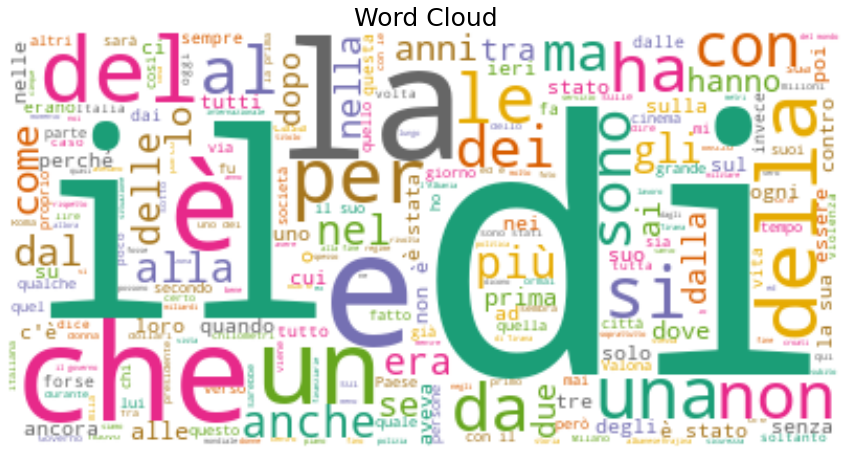

In [ ]:
import numpy as np  
import pandas as pd 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
df_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    colormap="Dark2")

# generate the word cloud
df_wc.generate(df_string)
fig = plt.figure(figsize=(15, 15))
plt.imshow(df_wc, interpolation='bilinear')
plt.title('Word Cloud', fontsize = 25)
plt.axis('off')
plt.show()

From the WordCloud above we can see thath the presence of StopWords is huge, consistently with the language we are analyzing.

To solve this Visual problem, we added manually to the StopWords list the displayed words.

In [ ]:
adding_stop_words = ['stato', 'lui', 'fatto', 'volta', 'volte', 'soltanto', 'verso', 'o', 'anni', 'chi', 'quale', 'secondo', 'volta', 'già', 'così', 
                     'giorno', 'però', 'simao', 'negli', 'quello', 'quel', 'grande', 'proprio', 'contro', 'qualche', 'ieri', 'fine', 'invece', 'fa', 
                     'dello', 'questo', 'tutto', 'sempre', 'sarà', 'aveva', 'essere', 'altri', 'c\'è', 'questa', 'ed', 'solo', 'dai', 'tre', 'quella', 
                     'tutti', 'ci', 'erano', 'nelle', 'cui', 'primo', 'forse', 'ogni', 'sul', 'poi', 'stata', 'senza', 'dalle','il', 'perché',  'due', 'uno', 
                     'su', 'nei', 'degli', 'quando', 'quanto', 'loro', 'ad', 'la', 'di', 'della', 'lo', 'ai', 'suo', 'sua', 'suoi', 'dove', 'tra', 'hanno', 
                     'alle', 'un', 'che', 'del', 'dal', 'nella', 'nel', 'dei', 'dopo', 'prima', 'se', 'dalla', 'sulla',  'delle', 'e', 'le', 'è', 'una', 
                     'per', 'con', 'non', 'da', 'al', 'ma', 'sono', 'ha', 'più', 'alla', 'si', 'gli', 'anche', 'come', 'ancora', 'mai', 'era']

for i in adding_stop_words:
  stopwords.add('{}'.format(i))

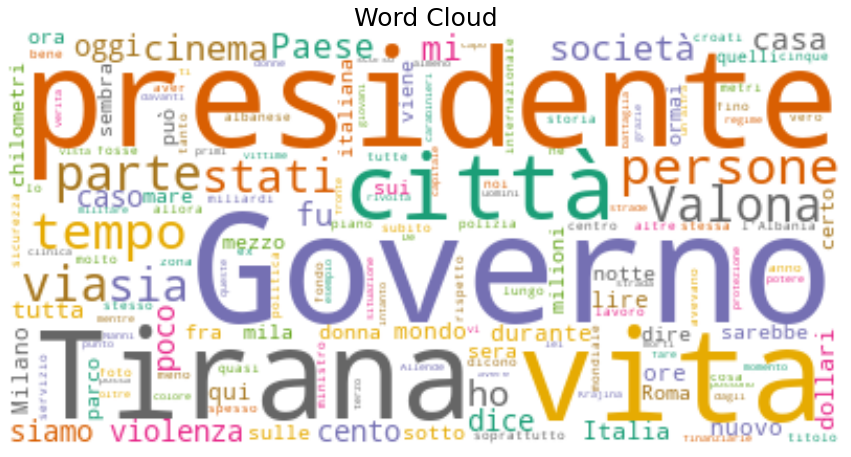

In [ ]:
df_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords = stopwords,
    colormap="Dark2")

# generate the word cloud
df_wc.generate(df_string)
fig = plt.figure(figsize=(15, 15))
plt.imshow(df_wc, interpolation='bilinear')
plt.title('Word Cloud', fontsize = 25)
plt.axis('off')
plt.show()

In the picture above we can see the main words present in all our italian dataset. It seems that the sentences are quite heterogeneous.

Now we want to reproduce this output considering only the words belonging to the sequences of some classes.

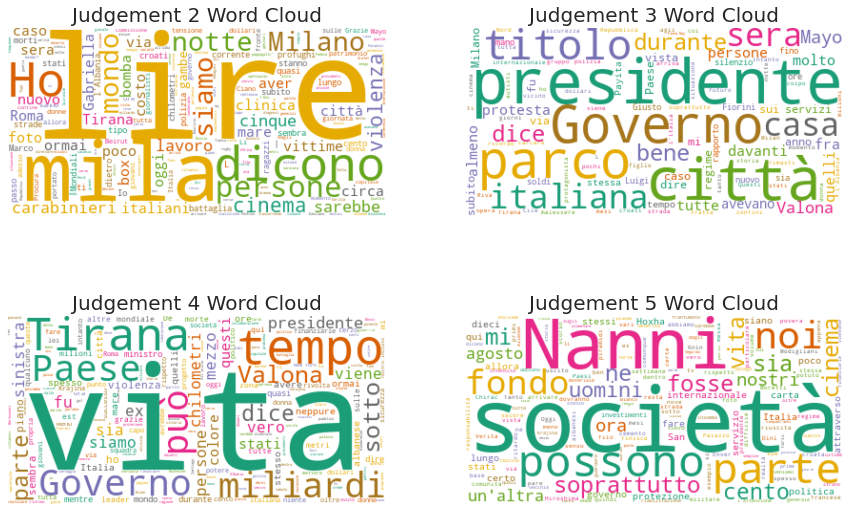

In [ ]:
# constructing the list for each Judgement in the dataset

df_2_string = ""
df_3_string = ""
df_4_string = ""
df_5_string = ""

for k in range(df.shape[0]):
  if df['Judgement'][k] == 2:
    df_2_string = df_2_string + " " + df['SENTENCE'][k]
  elif df['Judgement'][k] == 3:
    df_3_string = df_3_string + " " + df['SENTENCE'][k]
  elif df['Judgement'][k] == 4:
    df_4_string = df_4_string + " " + df['SENTENCE'][k]
  elif df['Judgement'][k] == 5:
    df_5_string = df_5_string + " " + df['SENTENCE'][k]
import seaborn as sns
from wordcloud import WordCloud
sns.set()
plt.rcParams['figure.figsize'] = [15, 15]

topics_list = [df_2_string, df_3_string, df_4_string, df_5_string]

wordcloud = WordCloud(background_color="white", stopwords = stopwords,
                      contour_color="black",  max_font_size=150, random_state=42,
                      colormap="Dark2")

# represent each Judgement class in a WordCloud
for i in range(4):
    wordcloud.generate(text=topics_list[i])   
    plt.subplot(3, 2, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    fontsize = 20
    plt.title(f'Judgement {i+2} Word Cloud', fontdict={'fontsize': fontsize})

plt.show()

From the final WordClouds we see that the covered topics are quite different in Judgement 2 and Judgement 5 sentences.

Now we proceed to the first model based on Recurrent Neural Network.

## **Recurrent Neural Network**

In [ ]:
!pip install gitpython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 5.2 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 


In [ ]:
import git
from git import Repo
import os

In [ ]:
try:
  Repo.clone_from("https://github.com/mf/NLP_Text_Mining.git", "./utils")
except:
  print('Directory already existing')

In [ ]:
%pwd

'/content'

In [ ]:
%cd utils

/content/utils


Now we create a folder in the environment to store the model for later purposes.

In [ ]:
try:
  path = os.path.join('./model')
  os.mkdir(path)
except:
  print('Directory already exist')

In the next 2 chunks we manage the import of the functions present in the util folder downloaded.

In [ ]:
import os
os.rename('./utils', './utils_1')

In [ ]:
from utils_1 import dataio, kerasutils, modelutils

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from utils_1 import dataio, kerasutils, modelutils
from sklearn import metrics
import os
import re
import urllib
import sklearn
import logging

For the model, as stated before, we will use the dataset with the Median as postition indicator

### Deleting stop words

Firstly we implement our RNN model not considering StopWords.

In [ ]:
data = df.copy()
data['SENTENCE'] = data['SENTENCE'].apply(lambda x: x.lower()) # transforming sentences in lowercase
data['Judgement'] = data['Judgement'].apply(lambda x: str(x)) # transforming judgements in strings

In [ ]:
for k in range(data.shape[0]):
  toks = nlp(data.loc[k,'SENTENCE'])
  new_sentence = ""
  tot_toks = len(toks)
  for i in toks:
    if nlp.vocab[str(i)].is_stop:
      new_sentence = new_sentence + ' ' + str(i)
  data.loc[k,'SENTENCE'] = new_sentence

In [ ]:
# tokenization of the senteces

max_features = 10000
tokenizer = Tokenizer(num_words = max_features, split=' ')
tokenizer.fit_on_texts(data['SENTENCE'].values)
X = tokenizer.texts_to_sequences(data['SENTENCE'].values)

In [ ]:
sequence_len = np.array([len(s) for s in X])
longest_sequence = sequence_len.max()
print(f'Longest sequence: {longest_sequence}')

# visualizing the percentile of the sentences length
print([(str(p) + '%', np.percentile(sequence_len, p)) for p in range(75,101, 5)])

Longest sequence: 22
[('75%', 12.0), ('80%', 13.0), ('85%', 14.0), ('90%', 15.0), ('95%', 16.0), ('100%', 22.0)]


In [ ]:
# padding to uniform sentences length to the longest one (21)
X = pad_sequences(X)

In [ ]:
# tranform the Judgement value in a dummy variable
Y = pd.get_dummies(data['Judgement']).values
# divide in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(785, 22)
(337, 22)


In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
%cd ..

/content


In [ ]:
%cd ./utils/model

/content/utils/model


In [ ]:
# stop condition for the model
early_stopping_callback = EarlyStopping(monitor="loss", min_delta = 0.01, patience=3, verbose=1, mode="auto", restore_best_weights=True)
# crate a directory to save the checkpoint without reloading it everytime
best_model_file = os.path.join('./','model_5.h5')
checkpoint = ModelCheckpoint( best_model_file,
    save_weights_only = True,
    save_best_only = True)

Here we define the function to implement K-fold Cross Validation which allows us to tune different models.

In [ ]:
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

batch_size = 128

# definition of K-Fold CrossValidation function

def K_fold_cross_validation(model_train, X_train, Y_train, num_fold = 5,
                            loss_function = 'categorical_crossentropy', optimizer = 'adam', batch_size = batch_size,
                            no_epochs = 10, verbosity= 2, early_stopping_callback = early_stopping_callback):
    # Merge inputs and targets
    inputs = X_train
    targets = Y_train

    # Define the K-fold Cross Validator
    kfold = KFold(n_splits=num_fold, shuffle=True,random_state=42)
    acc_per_fold = []
    loss_per_fold = []
    # K-fold Cross Validation model evaluation
    fold_no = 1
    weights_init = model_train.get_weights() 
    for train, test in kfold.split(inputs, targets):
      model = model_train

      model.set_weights(weights_init)

      # Compile the model
      model.compile(loss=loss_function,
                    optimizer=optimizer,
                    metrics=['accuracy'])

      # Generate a print
      print('------------------------------------------------------------------------')
      print(f'Training for fold {fold_no} ...')

      # Fit data to model
      history = model.fit(inputs[train], targets[train],
                  batch_size=batch_size,
                  epochs=no_epochs,
                  verbose=verbosity,
                  callbacks = early_stopping_callback)

      # Generate generalization metrics
      scores = model.evaluate(inputs[test], targets[test], verbose=0)
      print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
      acc_per_fold.append(scores[1] * 100)
      loss_per_fold.append(scores[0])
      # Increase fold number
      fold_no = fold_no + 1
    print(f'Mean of accuracy in each fold: {round(np.mean(np.array(acc_per_fold)),4)}%')

Now we are going to implement an LSTM model using Keras Embedding, an LSTM hidden layer, with a dropout equal to 20%, and a Dense layer to obtain our output of 5 classes through a Softmax activation function.

#### LSTM without StopWords

In [ ]:
# Implementing 1st LSTM model

embed_dim = 256
lstm_out = 196

model = Sequential()
# Embedding
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
# LSTM
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
# linear NN
model.add(Dense(4, activation='softmax'))

K_fold_cross_validation(model_train = model, X_train = X_train, Y_train = Y_train, no_epochs = 5) 

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
5/5 - 9s - loss: 1.3342 - accuracy: 0.3025 - 9s/epoch - 2s/step
Epoch 2/5
5/5 - 2s - loss: 1.2211 - accuracy: 0.4347 - 2s/epoch - 402ms/step
Epoch 3/5
5/5 - 2s - loss: 1.1217 - accuracy: 0.5510 - 2s/epoch - 399ms/step
Epoch 4/5
5/5 - 2s - loss: 1.0633 - accuracy: 0.5462 - 2s/epoch - 399ms/step
Epoch 5/5
5/5 - 2s - loss: 1.0415 - accuracy: 0.5541 - 2s/epoch - 391ms/step
Score for fold 1: loss of 1.125530481338501; accuracy of 57.324838638305664%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
5/5 - 6s - loss: 1.3398 - accuracy: 0.3296 - 6s/epoch - 1s/step
Epoch 2/5
5/5 - 2s - loss: 1.2085 - accuracy: 0.4315 - 2s/epoch - 407ms/step
Epoch 3/5
5/5 - 2s - loss: 1.1335 - accuracy: 0.5653 - 2s/epoch - 398ms/step
Epoch 4/5
5/5 - 2s - loss: 1.0595 - accuracy: 0.5478 - 2s/epoch - 419ms/step
Epoch 5/5
5/5 - 2s - loss: 1.0442 - accura

Thanks to the K-fold we obtain a mean of the validation accuracy of around 56% for the five folds defined. Now let's see if keeping the stopwords in our dataset is better or not.

### Keeping Stop Words

In order to improve our accuracy we decide to consider Stopwords, since deleting them may return poor sentences and information loss. In this way the model could better fit the data.

In [ ]:
data = df.copy()
data['SENTENCE'] = data['SENTENCE'].apply(lambda x: x.lower())
data['Judgement'] = data['Judgement'].apply(lambda x: str(x))

# tokenization of the senteces
max_features = 10000
tokenizer = Tokenizer(num_words = max_features, split=' ')
tokenizer.fit_on_texts(data['SENTENCE'].values)

X = tokenizer.texts_to_sequences(data['SENTENCE'].values)

In [ ]:
sequence_len = np.array([len(s) for s in X])
longest_sequence = sequence_len.max()
print(f'Longest sequence: {longest_sequence}')
# visualizing the percentile of te sentences length
print([(str(p) + '%', np.percentile(sequence_len, p)) for p in range(75,101, 5)])

Longest sequence: 33
[('75%', 23.0), ('80%', 24.0), ('85%', 25.0), ('90%', 26.0), ('95%', 28.0), ('100%', 33.0)]


In [ ]:
X = pad_sequences(X)

In [ ]:
# tranform the Judgement value in a dummy variable
Y = pd.get_dummies(data['Judgement']).values
# divide in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

(785, 33)
(337, 33)
(785, 4)


#### LSTM layers

We are going to implement again an LSTM model using Keras Embedding, an LSTM hidden layer with an internal and recurrent dropout equal to 20%, and a Dense layer to obtain our output of 5 classes through a Softmax activation function.

In [ ]:
# 1st LSTM model with stopwords

embed_dim = 256
lstm_out = 196

model = Sequential()
# Embedding
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
# LSTM
model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2))
# linear NN
model.add(Dense(4, activation = 'softmax'))

K_fold_cross_validation(model_train = model, X_train = X_train, Y_train = Y_train, no_epochs = 5)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
5/5 - 9s - loss: 1.3517 - accuracy: 0.3678 - 9s/epoch - 2s/step
Epoch 2/5
5/5 - 3s - loss: 1.2296 - accuracy: 0.3599 - 3s/epoch - 573ms/step
Epoch 3/5
5/5 - 3s - loss: 1.1879 - accuracy: 0.6656 - 3s/epoch - 564ms/step
Epoch 4/5
5/5 - 3s - loss: 1.0540 - accuracy: 0.5844 - 3s/epoch - 556ms/step
Epoch 5/5
5/5 - 3s - loss: 0.8687 - accuracy: 0.6592 - 3s/epoch - 578ms/step
Score for fold 1: loss of 1.0838412046432495; accuracy of 55.41401505470276%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
5/5 - 6s - loss: 1.3459 - accuracy: 0.3742 - 6s/epoch - 1s/step
Epoch 2/5
5/5 - 3s - loss: 1.2223 - accuracy: 0.3869 - 3s/epoch - 573ms/step
Epoch 3/5
5/5 - 3s - loss: 1.2084 - accuracy: 0.6306 - 3s/epoch - 556ms/step
Epoch 4/5
5/5 - 3s - loss: 1.0675 - accuracy: 0.6290 - 3s/epoch - 556ms/step
Epoch 5/5
5/5 - 4s - loss: 0.8978 - accura

We obtained a mean accuracy of around 58%.

From now on we try different models always considering Stopwords.

At this point we continue adding another LSTM hidden layer and increasing the dropout probability up to 50%, in order to see if implementing a more complex and structured model leads to an accuracy improvement.

In [ ]:
# 2nd LSTM model 

embed_dim = 256
lstm_out = 196

model = Sequential()
# Embedding
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
# LSTM layer
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.4, return_sequences = True))
# LSTM layer
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.4))
# Linear NN
model.add(Dense(4, activation='softmax'))

K_fold_cross_validation(model_train = model, X_train = X_train, Y_train = Y_train, no_epochs = 5)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
5/5 - 16s - loss: 1.3184 - accuracy: 0.3885 - 16s/epoch - 3s/step
Epoch 2/5
5/5 - 5s - loss: 1.0958 - accuracy: 0.5430 - 5s/epoch - 1s/step
Epoch 3/5
5/5 - 5s - loss: 1.0238 - accuracy: 0.5637 - 5s/epoch - 1s/step
Epoch 4/5
5/5 - 5s - loss: 0.8819 - accuracy: 0.6417 - 5s/epoch - 1s/step
Epoch 5/5
5/5 - 5s - loss: 0.8051 - accuracy: 0.6688 - 5s/epoch - 1s/step
Score for fold 1: loss of 1.0584845542907715; accuracy of 56.68789744377136%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
5/5 - 13s - loss: 1.3118 - accuracy: 0.3121 - 13s/epoch - 3s/step
Epoch 2/5
5/5 - 5s - loss: 1.1931 - accuracy: 0.4889 - 5s/epoch - 1s/step
Epoch 3/5
5/5 - 5s - loss: 1.0658 - accuracy: 0.5732 - 5s/epoch - 1s/step
Epoch 4/5
5/5 - 5s - loss: 0.9160 - accuracy: 0.6146 - 5s/epoch - 1s/step
Epoch 5/5
5/5 - 5s - loss: 0.8362 - accuracy: 0.6322 - 5s/e

Having increased the number of LSTM and tried to avoid the overfitting with the Dropout layer we obtain a slight increase in our validation accuracy up to 59% of validation accuracy

Now we try to add another LSTM layer.

In [ ]:
# 2nd LSTM model 

embed_dim = 256
lstm_out = 196

model = Sequential()
# Embedding
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
# LSTM layer
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.4, return_sequences = True))
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.4, return_sequences = True))
# LSTM layer
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.4))
# Linear NN
model.add(Dense(4, activation='softmax'))

K_fold_cross_validation(model_train = model, X_train = X_train, Y_train = Y_train, no_epochs = 5)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
5/5 - 24s - loss: 1.3053 - accuracy: 0.3471 - 24s/epoch - 5s/step
Epoch 2/5
5/5 - 8s - loss: 1.1713 - accuracy: 0.5223 - 8s/epoch - 2s/step
Epoch 3/5
5/5 - 8s - loss: 0.9851 - accuracy: 0.5573 - 8s/epoch - 2s/step
Epoch 4/5
5/5 - 9s - loss: 0.8935 - accuracy: 0.6242 - 9s/epoch - 2s/step
Epoch 5/5
5/5 - 9s - loss: 0.7947 - accuracy: 0.6672 - 9s/epoch - 2s/step
Score for fold 1: loss of 1.0256543159484863; accuracy of 56.68789744377136%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
5/5 - 19s - loss: 1.3384 - accuracy: 0.3662 - 19s/epoch - 4s/step
Epoch 2/5
5/5 - 8s - loss: 1.2359 - accuracy: 0.4156 - 8s/epoch - 2s/step
Epoch 3/5
5/5 - 8s - loss: 1.1607 - accuracy: 0.5653 - 8s/epoch - 2s/step
Epoch 4/5
5/5 - 8s - loss: 0.9779 - accuracy: 0.5876 - 8s/epoch - 2s/step
Epoch 5/5
5/5 - 8s - loss: 0.8530 - accuracy: 0.6433 - 8s/e

Adding a third LSTM layer did not bring to an improvement of the accuracy so we try to move to the Bi-LSTM model.

#### Bi-LSTM model

We tried with two Bidirectional LSTM layers with a Dropout of 50%, to see if it would have lead and improvement.

Bidirectional long-short term memory (Bidirectional LSTM) is the process of making any neural network to have the sequence information in both directions, backwards (future to past) or forward (past to future).

In [ ]:
# Bi-LSTM model

embed_dim = 256
lstm_out = 196

model = Sequential()
# Embedding
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
# Bi-LSTM hidden layer
model.add(Bidirectional(LSTM(lstm_out, return_sequences=True, 
                                 dropout = 0.5))) 
# Bi-LSTM hidden layer 
model.add(Bidirectional(LSTM(lstm_out, return_sequences=False, 
                                 dropout = 0.5)))
# Linear NN
model.add(Dense(4, activation='softmax'))

K_fold_cross_validation(model_train = model, X_train = X_train, Y_train = Y_train, no_epochs = 5)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
5/5 - 27s - loss: 1.2854 - accuracy: 0.3312 - 27s/epoch - 5s/step
Epoch 2/5
5/5 - 6s - loss: 1.1174 - accuracy: 0.5685 - 6s/epoch - 1s/step
Epoch 3/5
5/5 - 6s - loss: 0.9517 - accuracy: 0.5860 - 6s/epoch - 1s/step
Epoch 4/5
5/5 - 6s - loss: 0.8009 - accuracy: 0.6624 - 6s/epoch - 1s/step
Epoch 5/5
5/5 - 6s - loss: 0.6113 - accuracy: 0.7723 - 6s/epoch - 1s/step
Score for fold 1: loss of 1.2013875246047974; accuracy of 54.14012670516968%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
5/5 - 14s - loss: 1.3028 - accuracy: 0.3408 - 14s/epoch - 3s/step
Epoch 2/5
5/5 - 6s - loss: 1.1223 - accuracy: 0.5366 - 6s/epoch - 1s/step
Epoch 3/5
5/5 - 6s - loss: 0.9748 - accuracy: 0.5892 - 6s/epoch - 1s/step
Epoch 4/5
5/5 - 6s - loss: 0.8422 - accuracy: 0.6481 - 6s/epoch - 1s/step
Epoch 5/5
5/5 - 6s - loss: 0.6976 - accuracy: 0.7086 - 6s/e

With the use of Bidirectional LSTM we do not have an increase in the accuracy to the one of the previous model composed of 2 LSTM layers.

Now let's try to make simpler the Bi-LSTM by considering only one Bi-LSTM layer with a dropout of 50%.

In [ ]:
# Bi-LSTM model

embed_dim = 256
lstm_out = 196

model = Sequential()
# Embedding
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
# Bi-LSTM hidden layer
model.add(Bidirectional(LSTM(lstm_out,
                                 dropout = 0.5)))
# Linear NN
model.add(Dense(4, activation='softmax'))

K_fold_cross_validation(model_train = model, X_train = X_train, Y_train = Y_train, no_epochs = 5)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
5/5 - 7s - loss: 1.3292 - accuracy: 0.2771 - 7s/epoch - 1s/step
Epoch 2/5
5/5 - 3s - loss: 1.1752 - accuracy: 0.4490 - 3s/epoch - 548ms/step
Epoch 3/5
5/5 - 3s - loss: 0.9657 - accuracy: 0.5924 - 3s/epoch - 551ms/step
Epoch 4/5
5/5 - 3s - loss: 0.8761 - accuracy: 0.6322 - 3s/epoch - 535ms/step
Epoch 5/5
5/5 - 3s - loss: 0.7387 - accuracy: 0.6752 - 3s/epoch - 541ms/step
Score for fold 1: loss of 1.1156779527664185; accuracy of 59.87260937690735%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
5/5 - 11s - loss: 1.3182 - accuracy: 0.2994 - 11s/epoch - 2s/step
Epoch 2/5
5/5 - 5s - loss: 1.1815 - accuracy: 0.4315 - 5s/epoch - 997ms/step
Epoch 3/5
5/5 - 3s - loss: 0.9982 - accuracy: 0.6146 - 3s/epoch - 542ms/step
Epoch 4/5
5/5 - 3s - loss: 0.8874 - accuracy: 0.6354 - 3s/epoch - 543ms/step
Epoch 5/5
5/5 - 3s - loss: 0.7607 - accu

With this model we obtain similar results to the one that we got with 2 LSTM layers so we decided to train both models

#### Best model

After all these attempts, we landed to the best model which is the one built with the 2 LSTM layers. 

So we go on training that model

In [ ]:
batch_size = 128

rnn_model = Sequential()


rnn_model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
# LSTM layer
rnn_model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.4, return_sequences = True))
# LSTM layer
rnn_model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.4))
# Linear NN
rnn_model.add(Dense(4, activation='softmax'))

rnn_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

rnn_model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 2)

Epoch 1/5
7/7 - 16s - loss: 1.3061 - accuracy: 0.3134 - 16s/epoch - 2s/step
Epoch 2/5
7/7 - 7s - loss: 1.0745 - accuracy: 0.5720 - 7s/epoch - 972ms/step
Epoch 3/5
7/7 - 7s - loss: 0.9283 - accuracy: 0.6242 - 7s/epoch - 977ms/step
Epoch 4/5
7/7 - 7s - loss: 0.8662 - accuracy: 0.6306 - 7s/epoch - 973ms/step
Epoch 5/5
7/7 - 11s - loss: 0.7311 - accuracy: 0.7045 - 11s/epoch - 2s/step


Prediction and confusion matrix

In [ ]:
def from_encode_to_literal_labels(y_true, y_pred):
    # Transform sequences of encoded labels in sequences of string labels
    let_y_true = list()
    let_y_pred = list()
    for sent_idx in range(len(y_true)):
        let_y_true.append(str(y_true[sent_idx] + 1))
        let_y_pred.append(str(y_pred[sent_idx] + 1))
    
    return let_y_true, let_y_pred

In [ ]:
datasets = [('Training Set', X_train, Y_train), ('Test Set', X_test, Y_test)]

for title, X, Y in datasets:
    Y_pred = rnn_model.predict(X, batch_size = batch_size)
    Y_pred = np.array(np.argmax(Y_pred, axis = -1))
    Y = np.array(np.argmax(Y, axis=-1))
    let_y_true, let_y_pred = from_encode_to_literal_labels(Y, Y_pred)


    print(title)
    print(metrics.classification_report(let_y_true, let_y_pred))
    print('\n')


7/7 [==============================] - 2s 219ms/step
Training Set
              precision    recall  f1-score   support

           1       0.83      0.94      0.88       263
           2       0.82      0.59      0.69       196
           3       0.72      0.92      0.81       252
           4       0.96      0.30      0.45        74

    accuracy                           0.79       785
   macro avg       0.83      0.69      0.71       785
weighted avg       0.80      0.79      0.77       785



3/3 [==============================] - 1s 202ms/step
Test Set
              precision    recall  f1-score   support

           1       0.68      0.75      0.72       101
           2       0.37      0.26      0.31        84
           3       0.49      0.67      0.56       110
           4       0.53      0.19      0.28        42

    accuracy                           0.53       337
   macro avg       0.52      0.47      0.47       337
weighted avg       0.52      0.53      0.51       337



From the trained model we focused on the prediction on the test dataset. We can see some problems:
 
*   Model tends to overfit the Training Set: we decided to stop the training after 5 epochs to try to reduce the overfitting problem;
*   The performance of the Test Set is quite low, in particular the second and last classes have great problems and the Network cannot classify them correctly.



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(12,12))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix", fontsize = 20)
    plt.grid(False)
    plt.show()

11/11 [==============================] - 2s 152ms/step


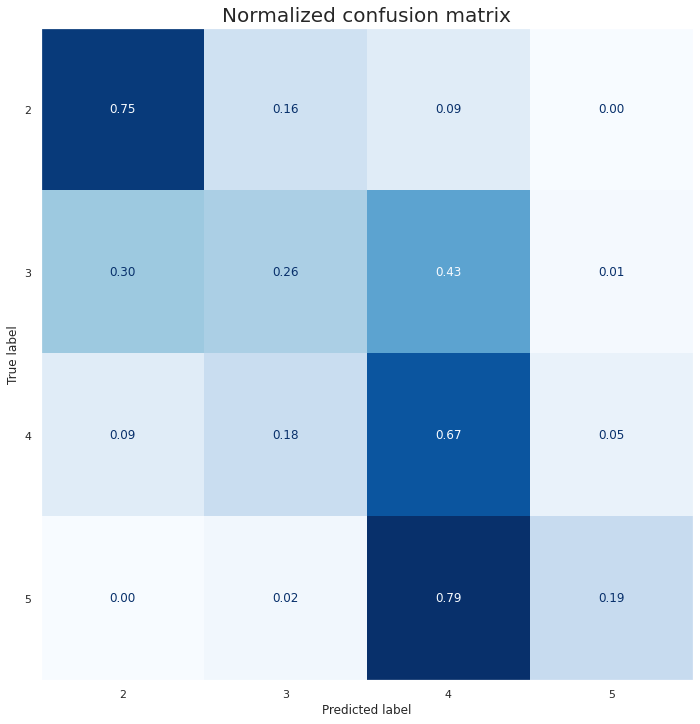

In [ ]:
labels = ['2','3','4','5']
predictions = rnn_model.predict(X_test)
y_preds = np.argmax(predictions, axis=1)
y_test = np.argmax(Y_test, axis =1)
plot_confusion_matrix(y_preds, y_test, labels)

We used the Confusion Matrix to visualize how our model performs in classifying our 4 classes.

From the results above we can see that it has some problems with the identification of classes 3 and 5.

Class '3' we see that it is classified as one of the adjacent class and class '5' sentences are mainly classified as class '4'.


## **Transformers**

In [ ]:
import random
import pandas as pd
import numpy as np
import os
from utils_1 import dataio
from utils_1 import dataio, kerasutils, modelutils
!pip install torch
!pip install transformers
!pip install umap-learn
import torch
from torch.utils.data import DataLoader
from torch.optim import SGD, Adam
from tqdm import tqdm
!pip install seqeval
from seqeval.metrics import classification_report
from transformers import AutoTokenizer
!pip install datasets
import datasets
from datasets import DatasetDict, Dataset
from transformers import AutoModel
from transformers import AutoModelForSequenceClassification
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from transformers import Trainer, TrainingArguments
from sklearn.linear_model import LogisticRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 43.6 MB/s 
     |████████████████████████████████| 182 kB 49.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 29.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=2ff26e80767954596997a2c1e9ea788152b1b1ec50d06b0c5c5a6ebd56f0cdcc
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=4e83582df8e52aba94eaa2c06fe38c9490a15d87ce9aa12fee7807e8

First of all we start preparing the data for the model.

In [ ]:
data = df_median
data['SENTENCE'] = data['SENTENCE'].apply(lambda x: x.lower())
data['Judgement'] = data['Judgement'].apply(lambda x: int(str(x))-2)

In [ ]:
sentences = data['SENTENCE']
ex_sent = data['SENTENCE'][0]
ex_sent

'quanto alla camminata incerta, va attribuita, fino a prova contraria, alla causa di sempre:'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('dbmdz/bert-base-italian-xxl-uncased')
tokenized_sentence = tokenizer(ex_sent, padding='max_length', max_length=33,truncation=True, return_tensors="pt")
print(tokenizer.decode(tokenized_sentence.input_ids[0]))

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

[CLS] quanto alla camminata incerta, va attribuita, fino a prova contraria, alla causa di sempre : [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
tokenizer.model_input_names

['input_ids', 'token_type_ids', 'attention_mask']

In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
X,Y = data['SENTENCE'] , data['Judgement']

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.20, random_state = 42)

In [ ]:
train_ds_pandas = pd.concat([pd.Series(X_train),pd.Series(Y_train)],axis=1)
valid_ds_pandas = pd.concat([pd.Series(X_valid),pd.Series(Y_valid)],axis=1)
test_ds_pandas = pd.concat([pd.Series(X_test),pd.Series(Y_test)],axis=1)

In [ ]:
train_ds_pandas.columns = ['text', 'label']
valid_ds_pandas.columns = ['text', 'label']
test_ds_pandas.columns = ['text', 'label']

In [ ]:
trainds = Dataset.from_pandas(train_ds_pandas)
vds = Dataset.from_pandas(valid_ds_pandas)
testds = Dataset.from_pandas(test_ds_pandas)

In order to deal with the transformer model we decided to create a DatasetDict object and put our data in it.

In [ ]:
ds = DatasetDict()

ds['train'] = trainds
ds['validation'] = vds
ds['test'] = testds

print(ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 628
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 157
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 337
    })
})


In [ ]:
print(tokenize(ds["train"][:2]))

{'input_ids': [[102, 143, 465, 416, 214, 2543, 13584, 557, 172, 1481, 5272, 287, 7973, 7640, 1156, 557, 152, 1279, 159, 1641, 508, 188, 5739, 358, 2341, 1156, 557, 184, 5026, 184, 143, 24811, 687, 103], [102, 143, 6674, 137, 4974, 6302, 123, 309, 1481, 1481, 19454, 27813, 30941, 359, 24987, 1481, 1481, 2594, 687, 103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [ ]:
ds_encoded = ds.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In the following chunk we check for the correctness of the tokenization applied in the previous chunk.

In [ ]:
print(ds_encoded["train"].column_names)

['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']


We decided to download the following pre-trained model "dbmdz/bert-base-italian-xxl-uncased"

In [ ]:
model_ckpt = "dbmdz/bert-base-italian-xxl-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-base-italian-xxl-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()} 

In [ ]:
ds_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
ds_hidden = ds_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

As done before for the tokenization we looked at the correctness of the extraction of the hidden states.

In [ ]:
ds_hidden["train"].column_names

['text',
 'label',
 'input_ids',
 'token_type_ids',
 'attention_mask',
 'hidden_state']

In [ ]:
X_train = np.array(ds_hidden["train"]["hidden_state"])
X_valid = np.array(ds_hidden["validation"]["hidden_state"])
y_train = np.array(ds_hidden["train"]["label"])
y_valid = np.array(ds_hidden["validation"]["label"])
X_test = np.array(ds_hidden["test"]["hidden_state"])
y_test = np.array(ds_hidden["test"]["label"])

In [ ]:
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = umap.UMAP(n_components=2, metric="cosine").fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,10.747941,8.449570,3
1,15.471946,9.099771,1
2,10.074835,10.198665,0
3,10.783225,8.028135,0
4,9.760572,8.298418,2


Let's investigate the compressed data a little bit further and plot the density of points for each category separately:

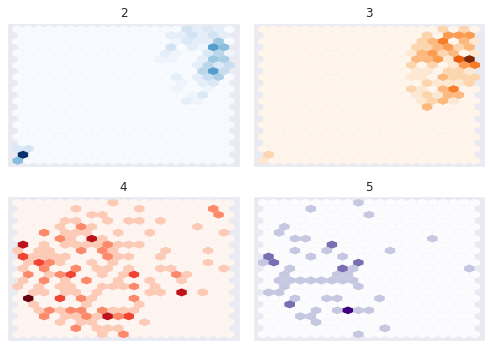

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Blues", "Oranges", "Reds", "Purples"]
labels = ['2','3','4','5']

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,)) #hex bin visualization
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

From the plot above we can see that the first and second classes have very similar patterns and it is reasonable that our models have difficulties in classify correctly these 2 classes.

Also the last 2 classes have similar pattern but with less evidence with respect to the first 2.

Now that we've gained some insight into the features of our dataset, let's finally train a model on it.

We try to fit the model with pre-trained weights to see how well it predicts.

In [ ]:
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
lr_clf.score(X_valid, y_valid)

0.4713375796178344

We see an accuracy of 47% on the validation set, which is lower than the results obtained with the RNN results.

In [ ]:
lr_clf.score(X_test, y_test)

0.6053412462908012

We see an accuracy of 60% on the test set, which is much higher than the results obtained with the RNN results.

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.2997032640949555

The Dummy classifier represents a sort of lower bound for the accuracy since it predicts without considering informations contained in the features.

We see that our models have an accuracy much greater than the dummy classifier.

In the chunk above we see that for the Test set we still see that the pre-trained Distilbert behaves exactly like the RNN, meaning that the first 2 classes are better predicted than the last 2.

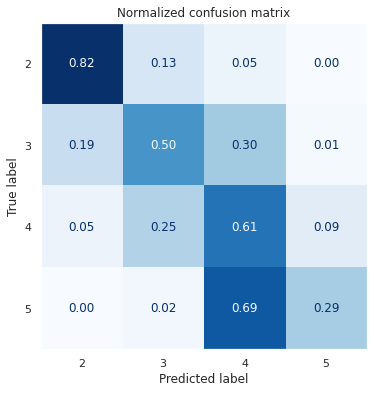

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.grid(False)
    plt.show()
    
y_preds = lr_clf.predict(X_test)
plot_confusion_matrix(y_preds, y_test, labels)

This confusion matrix agrees what we said before looking at the accuracies of each class.

### Fine tuning

After downloading our pretrained model, we need to do the fine tuning in order to adapt the pre trained weights to our dataset. 

In [ ]:
model_ckpt = "dbmdz/bert-base-italian-xxl-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
                      
num_labels = 4 
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=4)
         .to(device))

Some weights of the model checkpoint at dbmdz/bert-base-italian-xxl-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

Then we define the Training parameters with the TrainingArguments( ); this function will store all the information from the training process and will output all of them in the specified *output_dir*

In [ ]:
batch_size = 128
logging_steps = len(ds_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-judgements"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False, #tqdm to see the progress bar
                                  logging_steps=logging_steps,
                                  push_to_hub=False,  # do not push on the hugging face hub
                                  log_level="error")

In [ ]:
from transformers import Trainer

trainer_ita = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=ds_encoded["train"],
                  eval_dataset=ds_encoded["test"],
                  tokenizer=tokenizer)
trainer_ita.train();

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.095600,1.036349,0.545994,0.431286
2,1.013500,1.034915,0.551929,0.445850


In [ ]:
preds_output = trainer_ita.predict(ds_encoded["test"])
preds_output.metrics

{'test_loss': 1.0349153280258179,
 'test_accuracy': 0.5519287833827893,
 'test_f1': 0.4458496206090191,
 'test_runtime': 48.3931,
 'test_samples_per_second': 6.964,
 'test_steps_per_second': 0.062}

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_test = np.array(ds_hidden["test"]["label"])

In [ ]:
let_y_true, let_y_pred = from_encode_to_literal_labels(y_test, y_preds)
print('Test set')
print(metrics.classification_report(let_y_true, let_y_pred))

Test set
              precision    recall  f1-score   support

           1       0.63      0.88      0.74       101
           2       0.50      0.05      0.09        84
           3       0.49      0.85      0.62       110
           4       0.00      0.00      0.00        42

    accuracy                           0.55       337
   macro avg       0.41      0.44      0.36       337
weighted avg       0.48      0.55      0.45       337



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



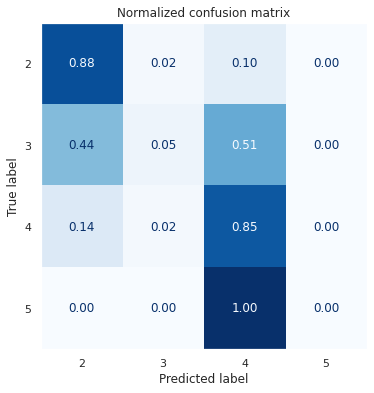

In [ ]:
labels = ['2','3','4','5']
plot_confusion_matrix(y_preds, y_test, labels)

From the precision and recall analysis and the confusion matrix we see that we have worse predictions since we classified sentences either with class '2' or class '4'.
The 2 mentioned classes absorbed the other 2 making this model not useful.

# **Conclusions**

Finally, for the italian dataset we have an overall accuracy of 53% for the RNN and a slightly increasing accurancy with the transformers approach despite the misclassification described above.

Comparing this result with the one obtained with the english dataset we get a less precise performance.

The above can be explained with more difficulties in judging the complexity of a sentence in italian.